
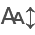

In [2]:
from rdflib import Graph, URIRef, Literal
import pandas
import os
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [20]:
query = """
prefix PDF: <http://ns.exiftool.org/PDF/PDF/1.0/> 
prefix prism: <http://ns.exiftool.org/XMP/XMP-prism/1.0/>
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix xmpdc: <http://ns.exiftool.org/XMP/XMP-dc/1.0/>
prefix xmppdf: <http://ns.exiftool.org/XMP/XMP-pdf/1.0/>
SELECT ?fname ?date ?title ?subject ?keywords ?doi  WHERE {
    ?fname PDF:Title ?title;
       PDF:Subject ?subject.
   optional {
    ?fname prism:DOI ?doi .
    }
    optional {
      ?fname xmppdf:Keywords ?keywords.
    }
    optional {
    ?fname xmpdc:Date ?date. }
}"""

In [21]:
graph = Graph().parse('metadata.rdf.xml')

In [33]:
results = graph.query(query)
df = pandas.DataFrame(data=results)
len(results)

22

In [34]:
df.columns = [str(v) for v in results.vars]

In [35]:
df.head()

fname                  date  \
0  file:///home/grotec/repos/presentations/tex/ai...  2023:09:21 14:00:00Z   
1  file:///home/grotec/repos/presentations/tex/Bi...  2024:02:22 09:00:00Z   
2  file:///home/grotec/repos/presentations/tex/Da...  2023:03:01 09:00:00Z   
3  file:///home/grotec/repos/presentations/tex/MP...  2022:01:12 09:00:00Z   
4  file:///home/grotec/repos/presentations/tex/MP...  2023:10:25 09:00:00Z   

                                               title  \
0              AI in Research - PostDoc Retreat 2023   
1  Performance Review of Retraining and Transfer ...   
2                          Detecting Fabricated Data   
3  From databases to knowledge graph for Pseudomo...   
4    Towards Unsupervised Image Segmentation for MPB   

                                             subject  \
0  Presentation for the PostDoc retreat discussio...   
1                                 BIOIMAGING24-RP-43   
2                             MPB Department Seminar   
3                             MPB Department Seminar   
4                             MPB Department Seminar   

                                            keywords   doi  
0  artificial intelligence, machine learning, evo...  None  
1  Deep learning, UNet, Delta2, Pseudomonas fluor...  None  
2  Benford's law, good scientific practise, Bayes...  None  
3  linked open data, tripal, SPARQL, genome datab...  None  
4  Deep learning, UNet, Delta2, Pseudomonas fluor...  None

In [36]:
df['fname'] = df['fname'].str.replace("file:///home/grotec/repos/presentations/tex/","")

In [29]:
df['doi'] = "https://dx.doi.org/" + df['doi']

In [37]:
df['doi'] = "<a href=https://dx.doi.org/" + df['doi'] + ">" + df['doi'] + "</a>"

In [41]:
df['title'] = "<a href=" + df['fname'] + ">" + df['title'] + "</a>"

In [42]:
df.head(20)

fname                  date  \
0                                ai_in_research.pdf  2023:09:21 14:00:00Z   
1                                Bioimaging2024.pdf  2024:02:22 09:00:00Z   
2           DataFraud--MPB-LabSeminar--20230301.pdf  2023:03:01 09:00:00Z   
3                        MPBLabSeminar_20220112.pdf  2022:01:12 09:00:00Z   
4      MPBLabSeminar_ImageSegmentation_20231025.pdf  2023:10:25 09:00:00Z   
5         MPBLabSeminar_MPIEB_DMPolicy-20240424.pdf  2024:04:24 09:00:00Z   
6   deep_learning_in_genomics--mpb_journal_club.pdf  2020:07:03 09:00:00Z   
7                     KI_und_Evolution-20240130.pdf  2024:01:30 19:00:00Z   
8                     KI_und_Evolution-20240430.pdf  2024:04:30 19:00:00Z   
9                     KI_und_Evolution-20240322.pdf  2024:03:22 14:00:00Z   
10                    KI_und_Evolution-20240507.pdf  2024:05:07 12:00:00Z   
11                 MPBDataPolicy_FDMSH-20240515.pdf  2024:05:15 14:00:00Z   
12                     mpb_lab_seminar-20200805.pdf  2020:08:05 09:00:00Z   
13                               mpieb-dmpolicy.pdf  2023:10:12 11:00:00Z   
14                 nfdi4bi-kickoff_cfg-20230620.pdf  2023:06:20 10:00:00Z   
15                         nfdi4bi-ta1-20240312.pdf  2024:03:12 11:00:00Z   
16                   nfdi-mpg_bioimage_20240418.pdf  2024:04:18 15:00:00Z   
17                       pflu-kb--orf-bosc-2022.pdf  2022:07:13 15:15:00Z   
18                           rarefan_biohpc2022.pdf  2023:01:16 11:00:00Z   
19  scicomp_services--group_leader_retreat_2022.pdf  2022:12:09 14:10:00Z   

                                                title  \
0   <a href=ai_in_research.pdf>AI in Research - Po...   
1   <a href=Bioimaging2024.pdf>Performance Review ...   
2   <a href=DataFraud--MPB-LabSeminar--20230301.pd...   
3   <a href=MPBLabSeminar_20220112.pdf>From databa...   
4   <a href=MPBLabSeminar_ImageSegmentation_202310...   
5   <a href=MPBLabSeminar_MPIEB_DMPolicy-20240424....   
6   <a href=deep_learning_in_genomics--mpb_journal...   
7   <a href=KI_und_Evolution-20240130.pdf>Künstlic...   
8   <a href=KI_und_Evolution-20240430.pdf>Künstlic...   
9   <a href=KI_und_Evolution-20240322.pdf>KI und E...   
10  <a href=KI_und_Evolution-20240507.pdf>Künstlic...   
11  <a href=MPBDataPolicy_FDMSH-20240515.pdf>Forsc...   
12  <a href=mpb_lab_seminar-20200805.pdf>Stochasti...   
13  <a href=mpieb-dmpolicy.pdf>Data Management Pol...   
14  <a href=nfdi4bi-kickoff_cfg-20230620.pdf>Max P...   
15  <a href=nfdi4bi-ta1-20240312.pdf>Linked (Open)...   
16  <a href=nfdi-mpg_bioimage_20240418.pdf>NFDI4BI...   
17  <a href=pflu-kb--orf-bosc-2022.pdf>From Genome...   
18  <a href=rarefan_biohpc2022.pdf>RAREFAN: A publ...   
19  <a href=scicomp_services--group_leader_retreat...   

                                              subject  \
0   Presentation for the PostDoc retreat discussio...   
1                                  BIOIMAGING24-RP-43   
2                              MPB Department Seminar   
3                              MPB Department Seminar   
4                              MPB Department Seminar   
5                              MPB Department Seminar   
6                                    MPB Journal Club   
7   Öffentlicher Abendvortrag am MPI f. Evolutions...   
8   Öffentlicher Abendvortrag am MPI f. Evolutions...   
9   Vortrag an der Johann-Heinrich-Voss Schule, Eutin   
10  Klönschnack Vortrag am MPI f. Evolutionsbiolog...   
11  Posterpräsentation bei der Digitalen Woche Kie...   
12  Presentation in Microbial Population Biology D...   
13                      Presentation to the Kollegium   
14                      NFDI4BIOIMAGE Kickoff Meeting   
15                        NFDI4BIOIMAGE TA1 Jour Fixe   
16  Presentation at the 2nd MPG-NFDI Workshop on A...   
17         ISMB Conference 2022 Ontologies COSI Track   
18     GWDG Life Science/Bioinformatics Workshop 2023   
19  MPI Evolutionary Biology Group Leader Retreat ...   

                                

In [46]:
df.drop(axis=1, columns='fname').to_json('../tex/presentations.json', orient='split')